In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Kiwi Parameterization
def kiwi_fit(G_0, Q_0):
    
    def fitting_function(Q2, a, b, c, d, e):
        Q_fm = np.sqrt(Q2)*(5.068) #Q in fm^-1

        poly = (1+a*Q_fm**2)*(1+b*Q_fm**2)*(1+c*Q_fm**2)*(1+d*Q_fm**2)*(1+e*Q_fm**2)
        
        return G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    
    return fitting_function

In [3]:
#Abbott Parameterization
def abbott_fit(G_0, Q_0):
    
    def fitting_function(Q2, a, b, c, d, e):
        Q_fm = np.sqrt(Q2)*(5.068) #Q in fm^-1

        poly = (1+a*Q_fm**2+b*Q_fm**4+c*Q_fm**6+d*Q_fm**8+e*Q_fm**10)
        
        return G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    
    return fitting_function

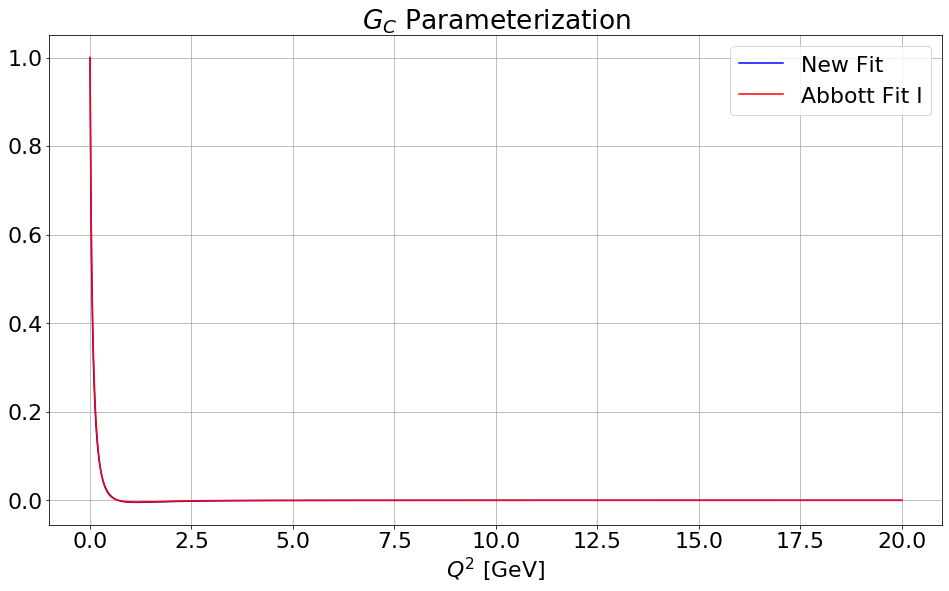

In [4]:
#Importing the experimental data
g_c_data = np.loadtxt('input_files/GC_Data.txt')
Q2 = g_c_data[:, 0]
GC = g_c_data[:, 1]
GC_error_hi = g_c_data[:, 2]
GC_error_lo = g_c_data[:, 3]

Q2_initial = 0
Q2_final = 20

#Creating a function to fit the data to
# G_0 = 1, Q_0 = 4.21
g_c_kiwi = kiwi_fit( 1., 4.21 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
g_c_param, g_c_cov = curve_fit( g_c_kiwi, Q2, GC, bounds = (0,np.inf) )

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
kiwi_GC = g_c_kiwi(kiwi_Q2, *g_c_param)

#Repeating for the Abbott fit
g_c_abbott = abbott_fit( 1., 4.21 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
abbott_param = (6.740E-01, 2.246E-02, 9.806E-03, -2.709E-04, 3.793E-06)
abbott_GC = g_c_abbott(abbott_Q2, *abbott_param)

#Creating a new matplotlib.pyplot figure
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (16,9))
plt.title('$G_C$ Parameterization')
plt.xlabel('$Q^2$ [GeV]')
plt.grid()

#Scatter plotting the experimental data
#plt.scatter(Q2, GC, color = 'black', marker = 'h', label = 'Data')

#Plotting the new fit function
plt.plot( kiwi_Q2, kiwi_GC, color = 'blue', label = 'New Fit')

#Plotting the Abbott fit function
plt.plot( abbott_Q2, abbott_GC, color = 'red', label = 'Abbott Fit I')

#Creating the legend
plt.legend(loc = 'upper right')

plt.savefig('output_files/g_c_parameterization_e.png')

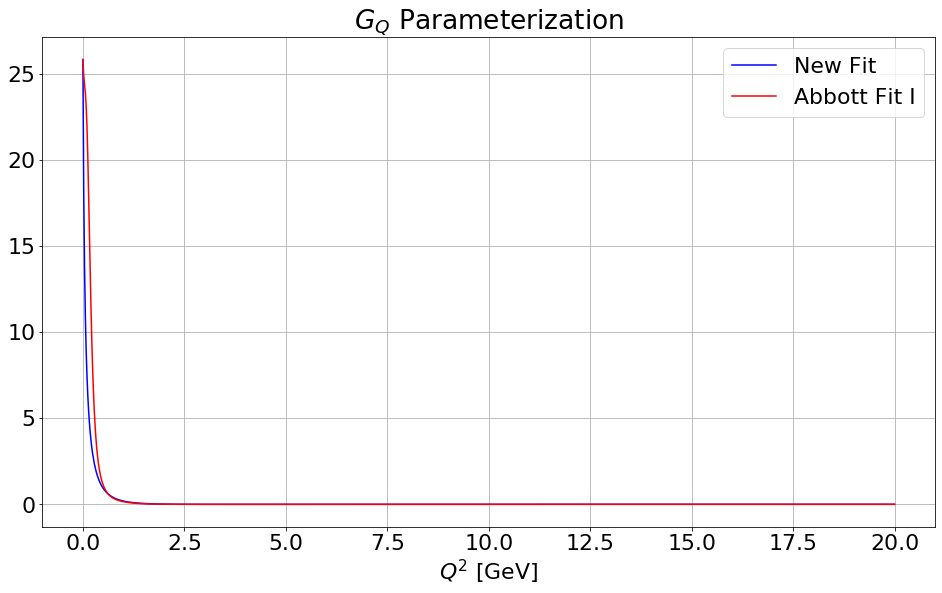

In [5]:
#Importing the experimental data
g_q_data = np.loadtxt('input_files/GQ_Data.txt')
Q2 = g_q_data[:, 0]
GQ = g_q_data[:, 1]
GQ_error_hi = g_q_data[:, 2]
GQ_error_lo = g_q_data[:, 3]

Q2_initial = 0
Q2_final = 20

#Creating a function to fit the data to
# G_0 = 5.83, Q_0 = 8.1
g_q_kiwi = kiwi_fit( 25.83, 8.1 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
popt, pcov = curve_fit( g_q_kiwi, Q2, GQ, bounds = (0,np.inf) )

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
kiwi_GQ = g_q_kiwi(kiwi_Q2, *popt)

#Repeating for the Abbott fit
g_q_abbott = abbott_fit( 25.83, 8.1 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
abbott_param = (.796E-01, -5.656E-02, 1.933E-02, -6.734E-04, 9.438E-06)
abbott_GQ = g_q_abbott(abbott_Q2, *abbott_param)

#Creating a new matplotlib.pyplot figure
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (16,9))
plt.title('$G_Q$ Parameterization')
plt.xlabel('$Q^2$ [GeV]')
plt.grid()

#Scatter plotting the experimental data
#plt.scatter(Q2, GQ, color = 'black', marker = 'h', label = 'Data')

#Plotting the new fit function
plt.plot( kiwi_Q2, kiwi_GQ, color = 'blue', label = 'New Fit')

#Plotting the Abbott fit function
plt.plot( abbott_Q2, abbott_GQ, color = 'red', label = 'Abbott Fit I')

#Creating the legend
plt.legend(loc = 'upper right')

plt.savefig('output_files/g_q_parameterization_e.png')

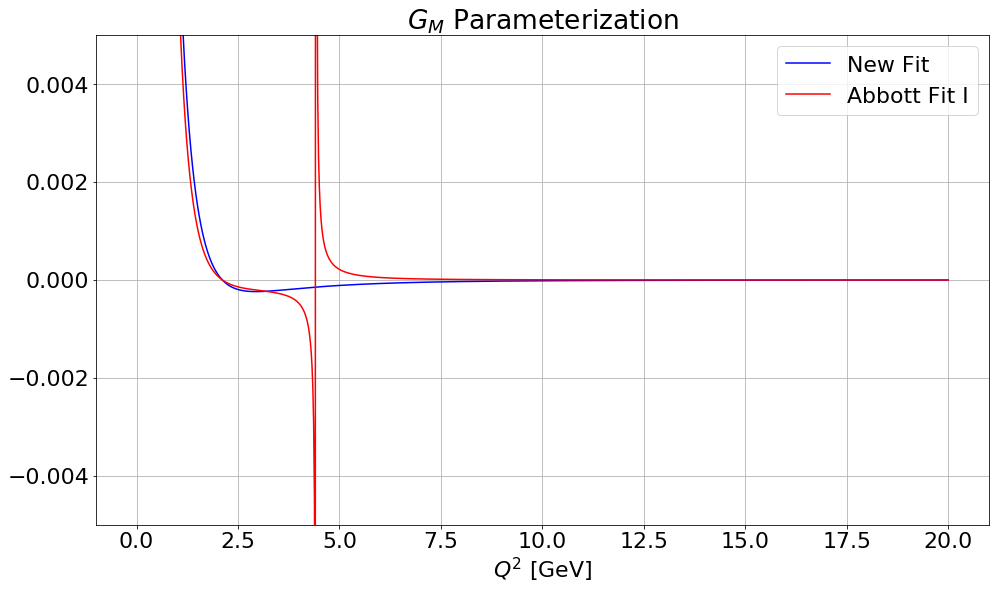

In [12]:
#Importing the experimental data
g_m_data = np.loadtxt('input_files/GM_Data.txt')
Q2 = g_m_data[:, 0]
GM = g_m_data[:, 1]
GM_error_hi = g_m_data[:, 2]
GM_error_lo = g_m_data[:, 3]

Q2_initial = 0
Q2_final = 20

#Creating a function to fit the data to
# G_0 = 1.714, Q_0 = 7.37
g_m_kiwi = kiwi_fit( 1.714, 7.37 )

#Fitting the data using the Scipy.optimize function curve_fit
#Bounding the parameters to being 0 <=
popt, pcov = curve_fit( g_m_kiwi, Q2, GM, bounds = (0,np.inf) )

#Using the fitted function to extend the range
kiwi_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
kiwi_GM = g_m_kiwi(kiwi_Q2, *popt)

#Repeating for the Abbott fit
g_m_abbott = abbott_fit( 1.714, 7.37 )

abbott_Q2 = np.linspace(Q2_initial, Q2_final, 1000)
abbott_param = (5.804E-01, 8.701E-02, -3.624E-03, 3.448E-04, -2.818E-06)
abbott_GM = g_m_abbott(abbott_Q2, *abbott_param)

#Creating a new matplotlib.pyplot figure
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (16,9))
plt.title('$G_M$ Parameterization')
plt.xlabel('$Q^2$ [GeV]')
plt.ylim(-0.005,0.005)
plt.grid()

#Scatter plotting the experimental data
#plt.scatter(Q2, GM, color = 'black', marker = 'h', label = 'Data')

#Plotting the new fit function
plt.plot( kiwi_Q2, kiwi_GM, color = 'blue', label = 'New Fit')

#Plotting the Abbott fit function
plt.plot( abbott_Q2, abbott_GM, color = 'red', label = 'Abbott Fit I')

#Creating the legend
plt.legend(loc = 'upper right')

plt.savefig('output_files/g_m_parameterization_e.png')